## Take Home Exercise 1

There's 10 visualizations below. Creation of each visualization is worth 1.5 point.

We will use the San Francisco Eviction dataset:

https://data.sfgov.org/Housing-and-Buildings/Eviction-Notices/5cei-gny5

Please create all plots as similar to the ones you can see below.

Please match:
- x-label name
- y-label name
- title
- orientation of plots
- type of plot
- data passed into plot

No need to *exactly* match but you should be close in:
- t-tick values (some libraries may show them slightly differently) 
- y-tick values (some libraries may show them slightly differently)
- size of fonts (though I used `sns.set_context('talk')`)
- figure size
- padding of title from plot (I used `y=1.015`)
- padding of labels (I used `labelpad=16`)

You can use whatever viz library in Python to create these ceate these such as Pandas Plot, Matplotlib, Seaborn, Plotly or something else.

### Import Modules

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
import matplotlib.ticker as tick
from datetime import date
%matplotlib inline

### Read in Data

In [5]:
df = pd.read_csv('Eviction_Notices.csv', low_memory=False)

### Set Visualization Styles

In [6]:
sns.set_context('talk')
sns.set_style('darkgrid')

### Count of Evictions Per Year

In Python, there are several data types of objects such as a `string`, `int`, `float`, and others. One data type is a `datetime`. Why do we need a `datetime` type? Well, there's great datetime-specific libraries full of helpful methods to manipulate and format dates in presentable ways. 

Try the following code below: `date.today()`. Note this works because of the import statement `from datetime import date` at the top of the notebook. This uses the `date` module in the `datetime` package and calls the method `today()` to retrieve today's date. 

Next, try copying that same code block below and add the `month` attribute at the end. It's August, the 8th month of the year and the output of our code therefore is `8`. You can read more about how it works in this section: https://docs.python.org/3/library/datetime.html#date-objects

Below, we'll use lots of datetime-specific functionality in Python and Pandas to help us make presentable visualizations around dates.

To easily get the count of evictions per year: we'll want to make a new column from `File Date` that's a `datetime` type. Then, similar to the `month` attribute above, we'll want to create a new column for the year value of the `File Date`.

Hints:

- Create a new column in Pandas: https://chrisalbon.com/python/data_wrangling/pandas_assign_new_column_dataframe/
- Create a datetime column: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
- Extract the year value from the datetime column: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.year.html

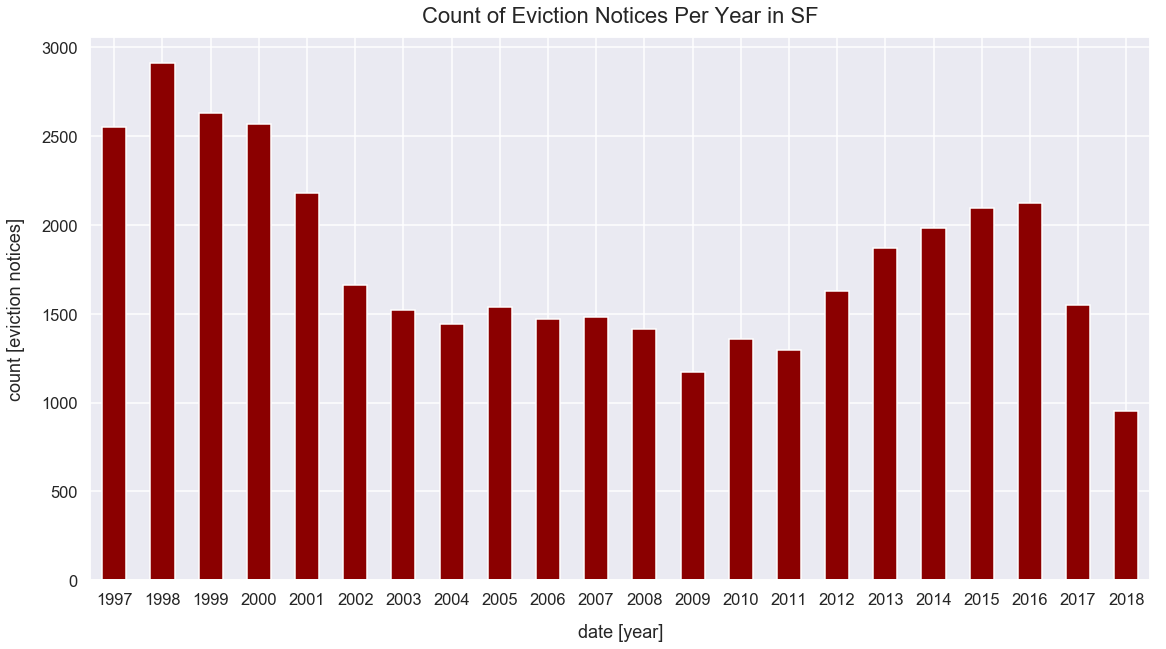

In [9]:
# code here

I think this visualization above is pretty good! However, the dates still crowd up the x-axis. There's redundancy in the `20` part of all the 2000s dates. Perhaps we can just use a three-character year value to indicate the year instead of four characters as that might be easier to read. So `2005` would be `'05` and `1998` would be `'98`.

Hints:
- Pandas method to create a new column that re-formats a datetime column: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.strftime.html
- Ways to modify datetime objects in Python to create new formatted strings: http://strftime.org
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.reindex.html

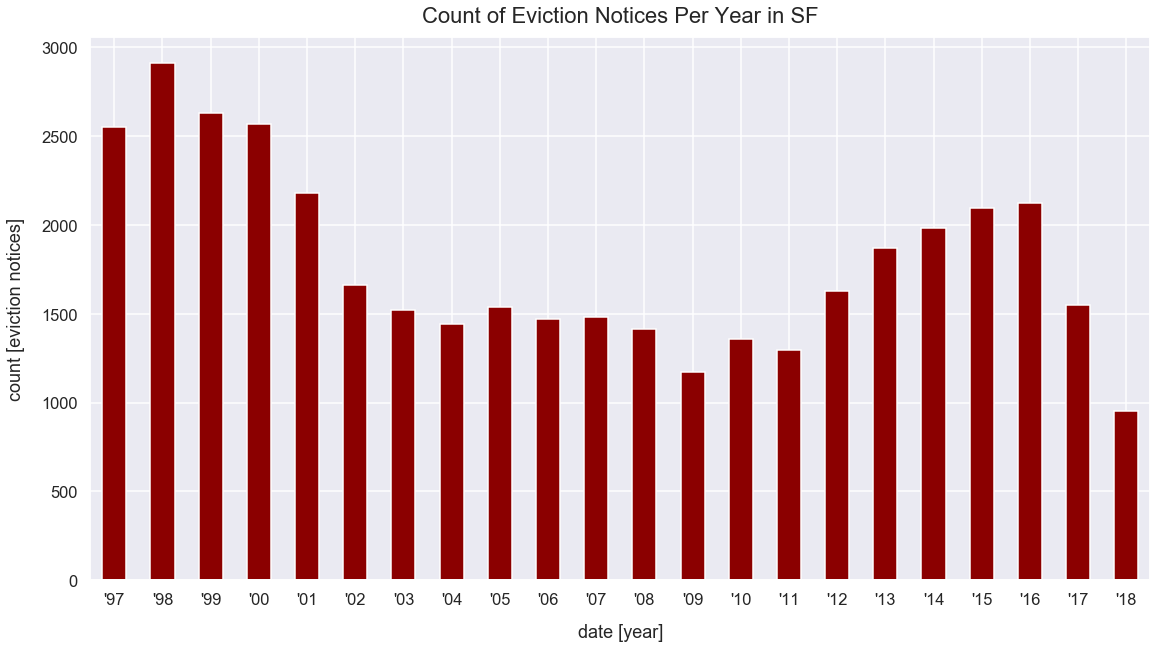

In [15]:
# code here

This shortening of the year value is especially helpful if you need to cram a lot of year values on the x-axis and/or you may be limited in the width of your figure. You're especially limited on width of figures for ones you put on slide decks.

### Count of Evictions Per Month

Hints: 

- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.month.html
- https://docs.python.org/3/library/calendar.html#calendar.month_abbr
- Pandas `apply` method to apply a calculation to a column: https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_dataframes/
- Reindex months in order: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.reindex.html & https://chrisalbon.com/python/data_wrangling/pandas_dataframe_reindexing/

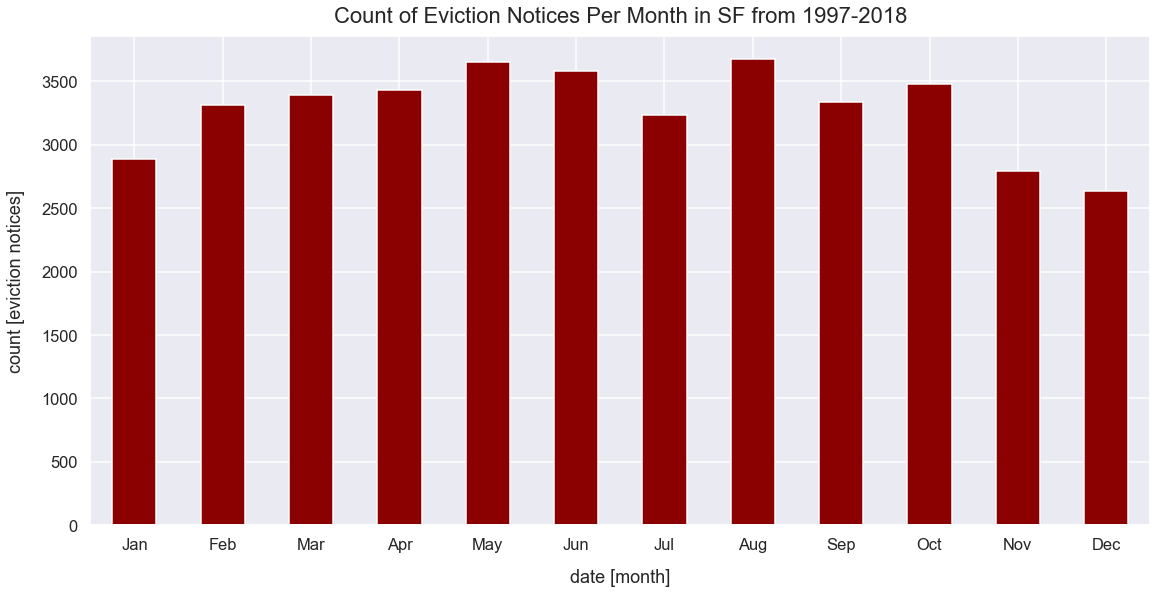

In [19]:
# code here

In [20]:
df['file_date'].sort_values().head()

34522   1997-01-02
34461   1997-01-02
10592   1997-01-02
35148   1997-01-02
24134   1997-01-02
Name: file_date, dtype: datetime64[ns]

In [21]:
df['file_date'].sort_values().tail()

26132   2018-07-09
26425   2018-07-09
26422   2018-07-09
26151   2018-07-09
26145   2018-07-09
Name: file_date, dtype: datetime64[ns]

Note, the counts are *not* true representations for the *average* of each month over time because some months occured more times in the dataset than others. For example, the dataset's final month is in August, and does not have months past August in 2018 since those haven't occured yet. So there is 22 instances of July months in our dataset but only 21 instances of Octobers month.  

### Average Evictions Per Month

There's likely multiple ways to get your data in the right shape to make the plot below. I'll share my method in hints.

Hints:

- Group by the file date year and file date month name and calculate the size of the groups. If you call the `reset_index()` method on the series, you can get a DataFrame in the following shape:

file date year | file date month name | count
--- | --- | ---
1997 | Apr | 225
1997 | Aug | 211
1997 | Dec | 218

- `reset_index()` method helps make a multi-index DataFrame (the result after a grouping by two columns in an operation) and makes it look like a more traditional single-index DataFrame: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html & https://www.datacamp.com/community/tutorials/pandas-multi-index
- With that DataFrame, you can now simply group by file month name and calculate the mean of the count of evictions for each month.
- To get the average count of evictions per month over all months, you can see a similar example on our previous exercise: https://github.com/frieds/msis_2629_exercises/blob/master/in_class_learning_exercises/learning_exercise_0_answers.ipynb

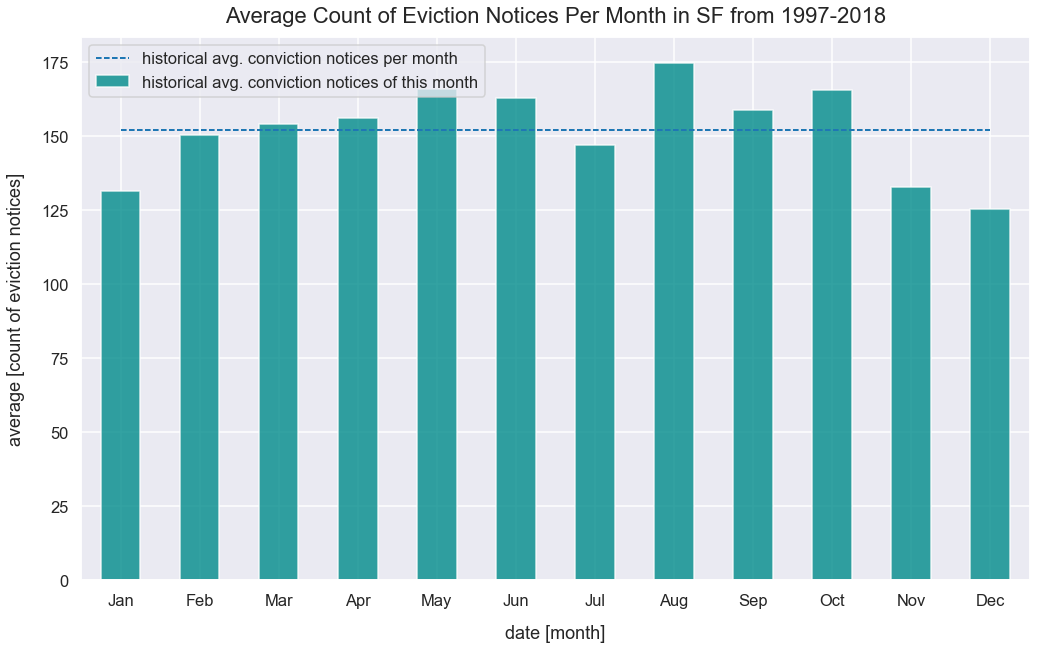

In [27]:
# code here

We can see a small pattern with evictions less likely than average during the winder months of December, January and February. 

December, on average, has the fewest evictions per month.

### Heatmap of Count of Evictions by Month and Year

Hints: 

- You can use similar logic to get your code in the format above which is an intermediary step towards getting the answer.

file date year | file date month name | count
--- | --- | ---
1997 | Apr | 225
1997 | Aug | 211
1997 | Dec | 218

- https://dfrieds.com/data-visualizations/when-use-heatmaps
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- You may need to reindex again to have the months show in proper order: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.reindex.html
- Examples of sequential color scales to use: https://matplotlib.org/examples/color/colormaps_reference.html

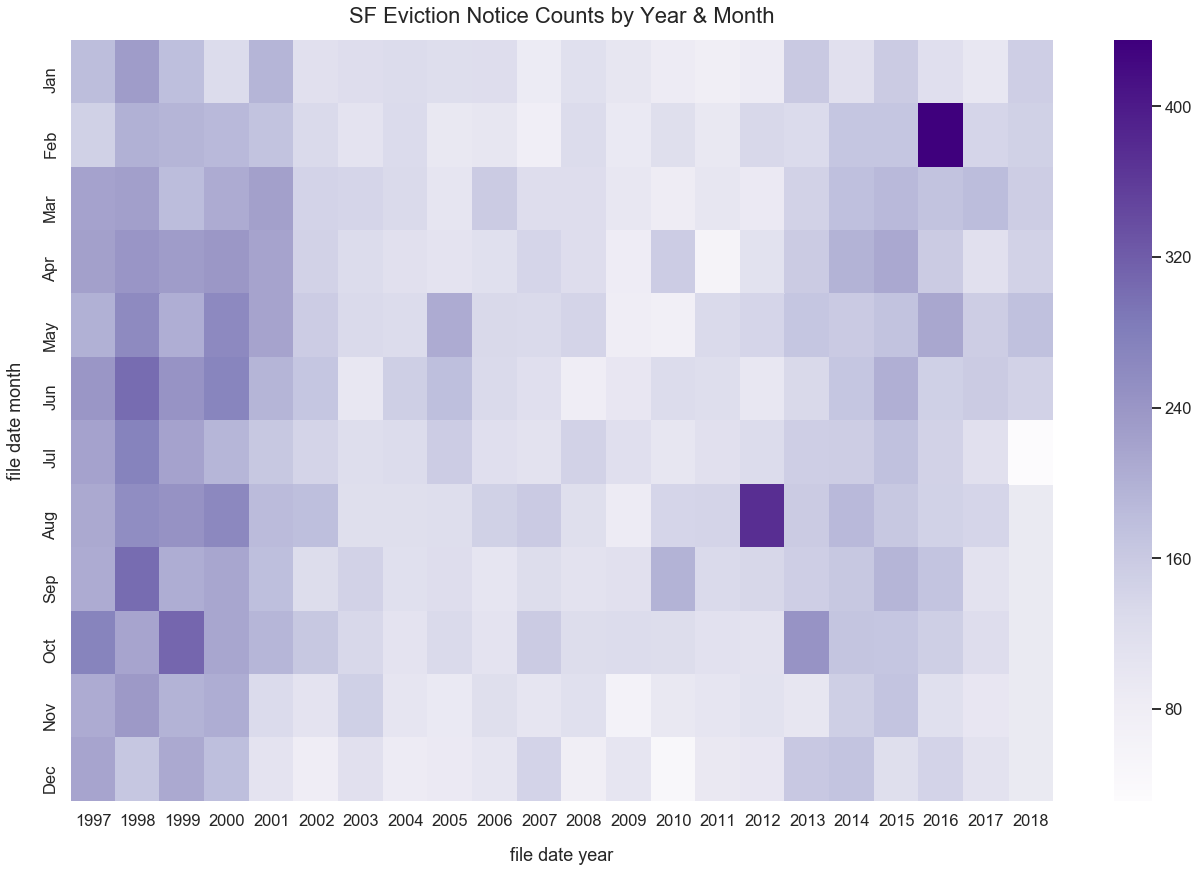

In [28]:
# code here

I purposely wanted you to design this heatmap without numerical values in the color because in this instance, I believe the numbers would be too distracting. 

I don't think there's any new discernable trends from this heatmap. I just figured it was good practice for creating this type of visualization.

### Recent Eviction Trends

This is a challenge because there aren't evictions every day. Let's try a simple bar plot of the count of evictions per day after June 1, 2018. I'll use the `file_date` column I created that was created as a datetime column from the original `File Date` column provided in the dataset.

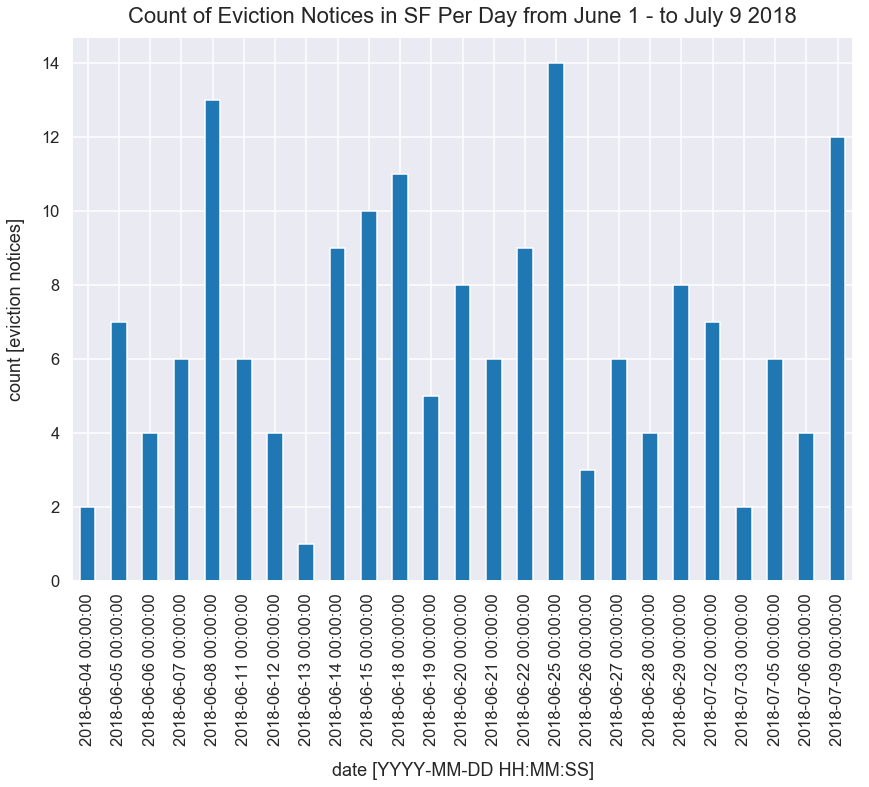

In [29]:
# code here

There's a lot of issues with this plot:

- The file date shows the hours, minutes and seconds value which is unnecessary since it's all `00:00:00`. This `00:00:00` appears by default when you create a datetime column, even if the original strings (such as 8/14/2018) didn't have a hour, minute or second. Also, there's redundancy to constantly see `2018` and constantly see `07` for the month value. Once we see that month or year value once, it's enough.
- The x-ticks are vertical and therefore difficult to read.
- Look for July 1, 2018. It doesn't exist in our dataset. The reason for that is there were no evictions that day. Other days are missing too. So, the graph seems odd since we skip several days. 

We can fix both of these! It's tricky to do. I did it one way and I'm sure there's several ways to reach our end goal of the visualization below. For the plot below, we'll *just* show the month of June.

I generated all the days using `pd.date_range()`, added them to DataFrame with just those dates as the only column. Then, I created another DataFrame of two columns: one being all the days in June 2018 and the other column being the count of evictions for each of those days. Next, I merged the DataFrames using `pd.merge()` (similar to a SQL join but in Pandas) and filled in `NaN` values with `0`. Then, I plotted the resultant DataFrame.

Hints:

- Generate dates given a start and end date: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html
- Rename columns in DataFrames: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html
- Create a DataFrame in Pandas: https://chrisalbon.com/python/data_wrangling/pandas_data_structures/
- Merge DataFrames in Pandas: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html and https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/

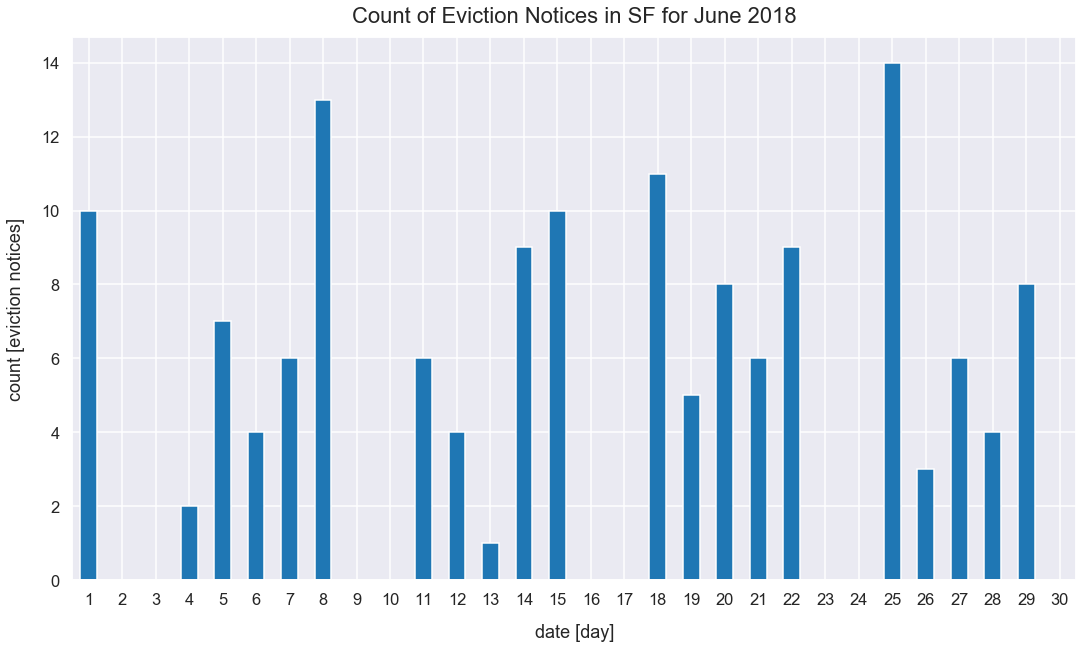

In [37]:
# code here

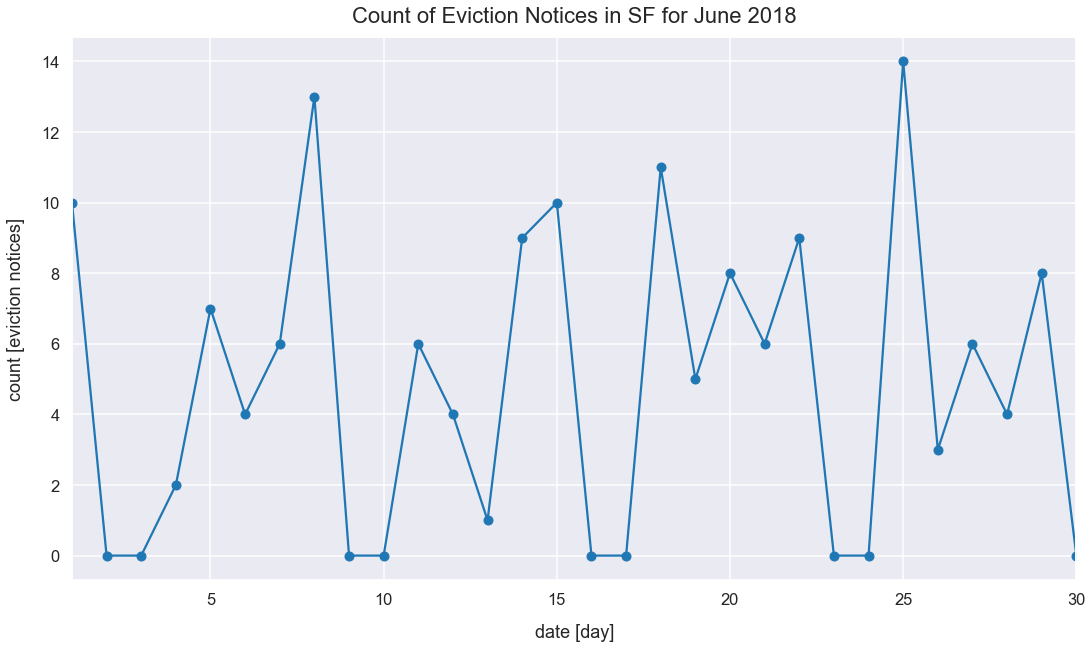

In [38]:
# code here

I prefer the bar plot over the line plot though both are acceptable.

### Most Popular Neighborhoods for Evictions

Hint: https://stackoverflow.com/a/40573050/1710454

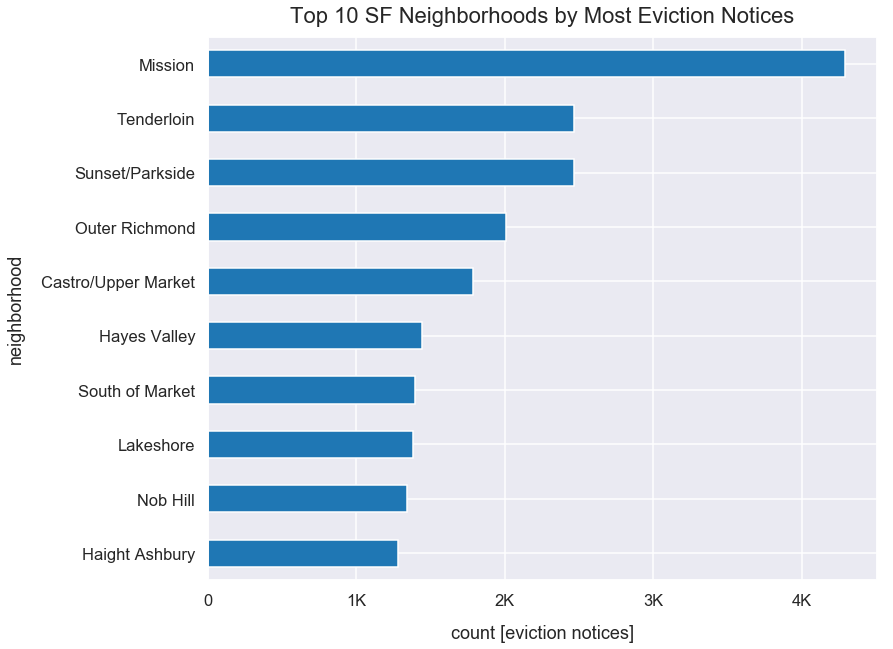

In [40]:
# code here

### Examine Trend of Evictions in Just The Mission District

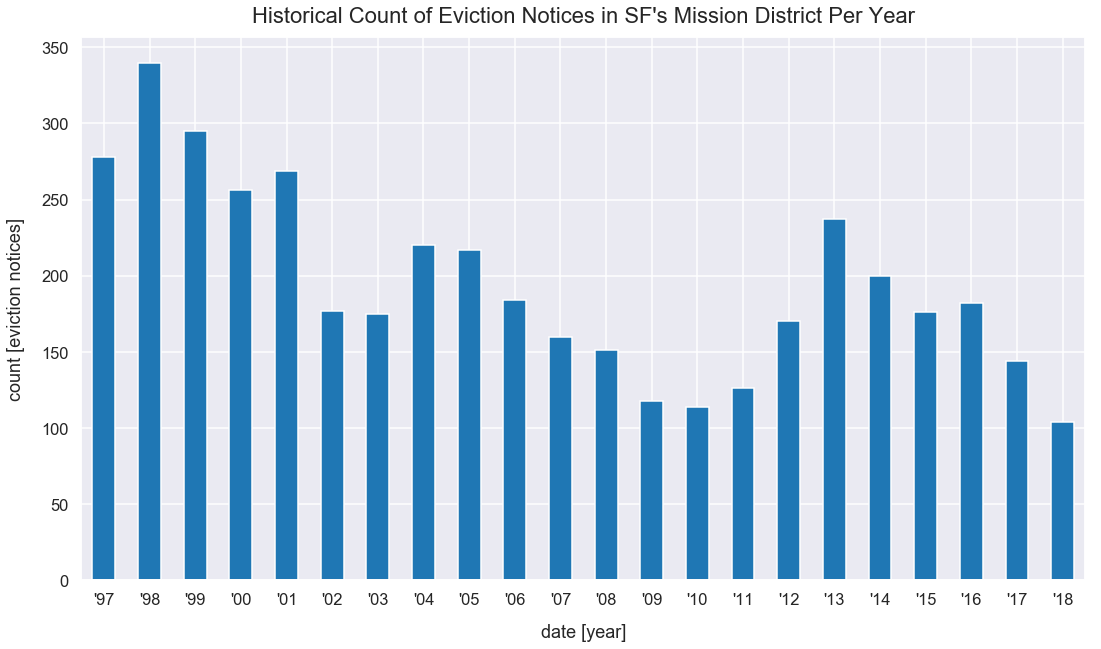

In [41]:
# code here